In [2]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("../Resources/AAL.csv")
print("Number of rows and columns:", df.shape)
df.head(5)

Number of rows and columns: (1343, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-27,40.150002,40.869999,39.480000,39.689999,37.929569,10186000
1,2016-01-28,39.610001,39.790001,37.660000,38.139999,36.448322,17112300
2,2016-01-29,37.520000,39.090000,36.599998,38.990002,37.260632,20957500
3,2016-02-01,39.000000,39.939999,38.630001,39.380001,37.633320,12023500
4,2016-02-02,38.830002,38.970001,37.000000,37.029999,35.387558,12401400


In [3]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [4]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [5]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [6]:
model.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
24/24 [==============================] - 16s 57ms/step - loss: 0.1272
Epoch 2/100
24/24 [==============================] - 1s 53ms/step - loss: 0.0211
Epoch 3/100
24/24 [==============================] - 1s 48ms/step - loss: 0.0138
Epoch 4/100
24/24 [==============================] - 1s 55ms/step - loss: 0.0133
Epoch 5/100
24/24 [==============================] - 1s 49ms/step - loss: 0.0116
Epoch 6/100
24/24 [==============================] - 1s 54ms/step - loss: 0.0116
Epoch 7/100
24/24 [==============================] - 1s 51ms/step - loss: 0.0085
Epoch 8/100
24/24 [==============================] - 1s 49ms/step - loss: 0.0101
Epoch 9/100
24/24 [==============================] - 1s 50ms/step - loss: 0.0115
Epoch 10/100
24/24 [==============================] - 1s 55ms/step - loss: 0.0115
Epoch 11/100
24/24 [==============================] - 1s 47ms/step - loss: 0.0093
Epoch 12/100
24/24 [==============================] - 1s 48ms/step - loss: 0.0096
Epoch 13/100
24/24 [====

In [7]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(459, 60, 1)


In [8]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

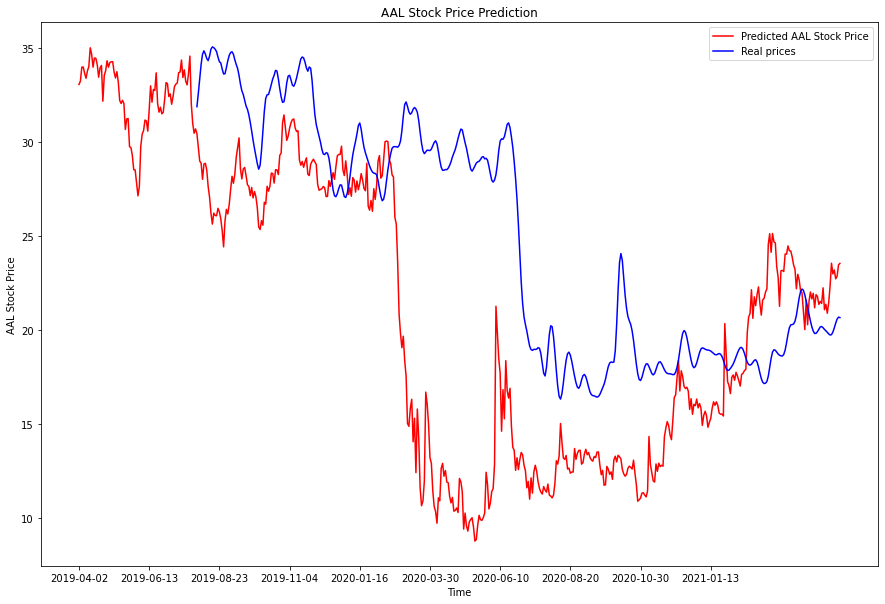

In [26]:
# Visualising the results
plt.figure(figsize=(15, 10))
plt.plot(df.loc[800:, "Date"],dataset_test.values, color = "red", label = "Predicted AAL Stock Price")
plt.plot(df.loc[884:, "Date"],predicted_stock_price, color = "blue", label = "Real prices")
plt.xticks(np.arange(0,459,50))
plt.title('AAL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAL Stock Price')
plt.legend()
plt.show()